# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10


## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

1.1 Скачайте данные в соответсвии с заданием.

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



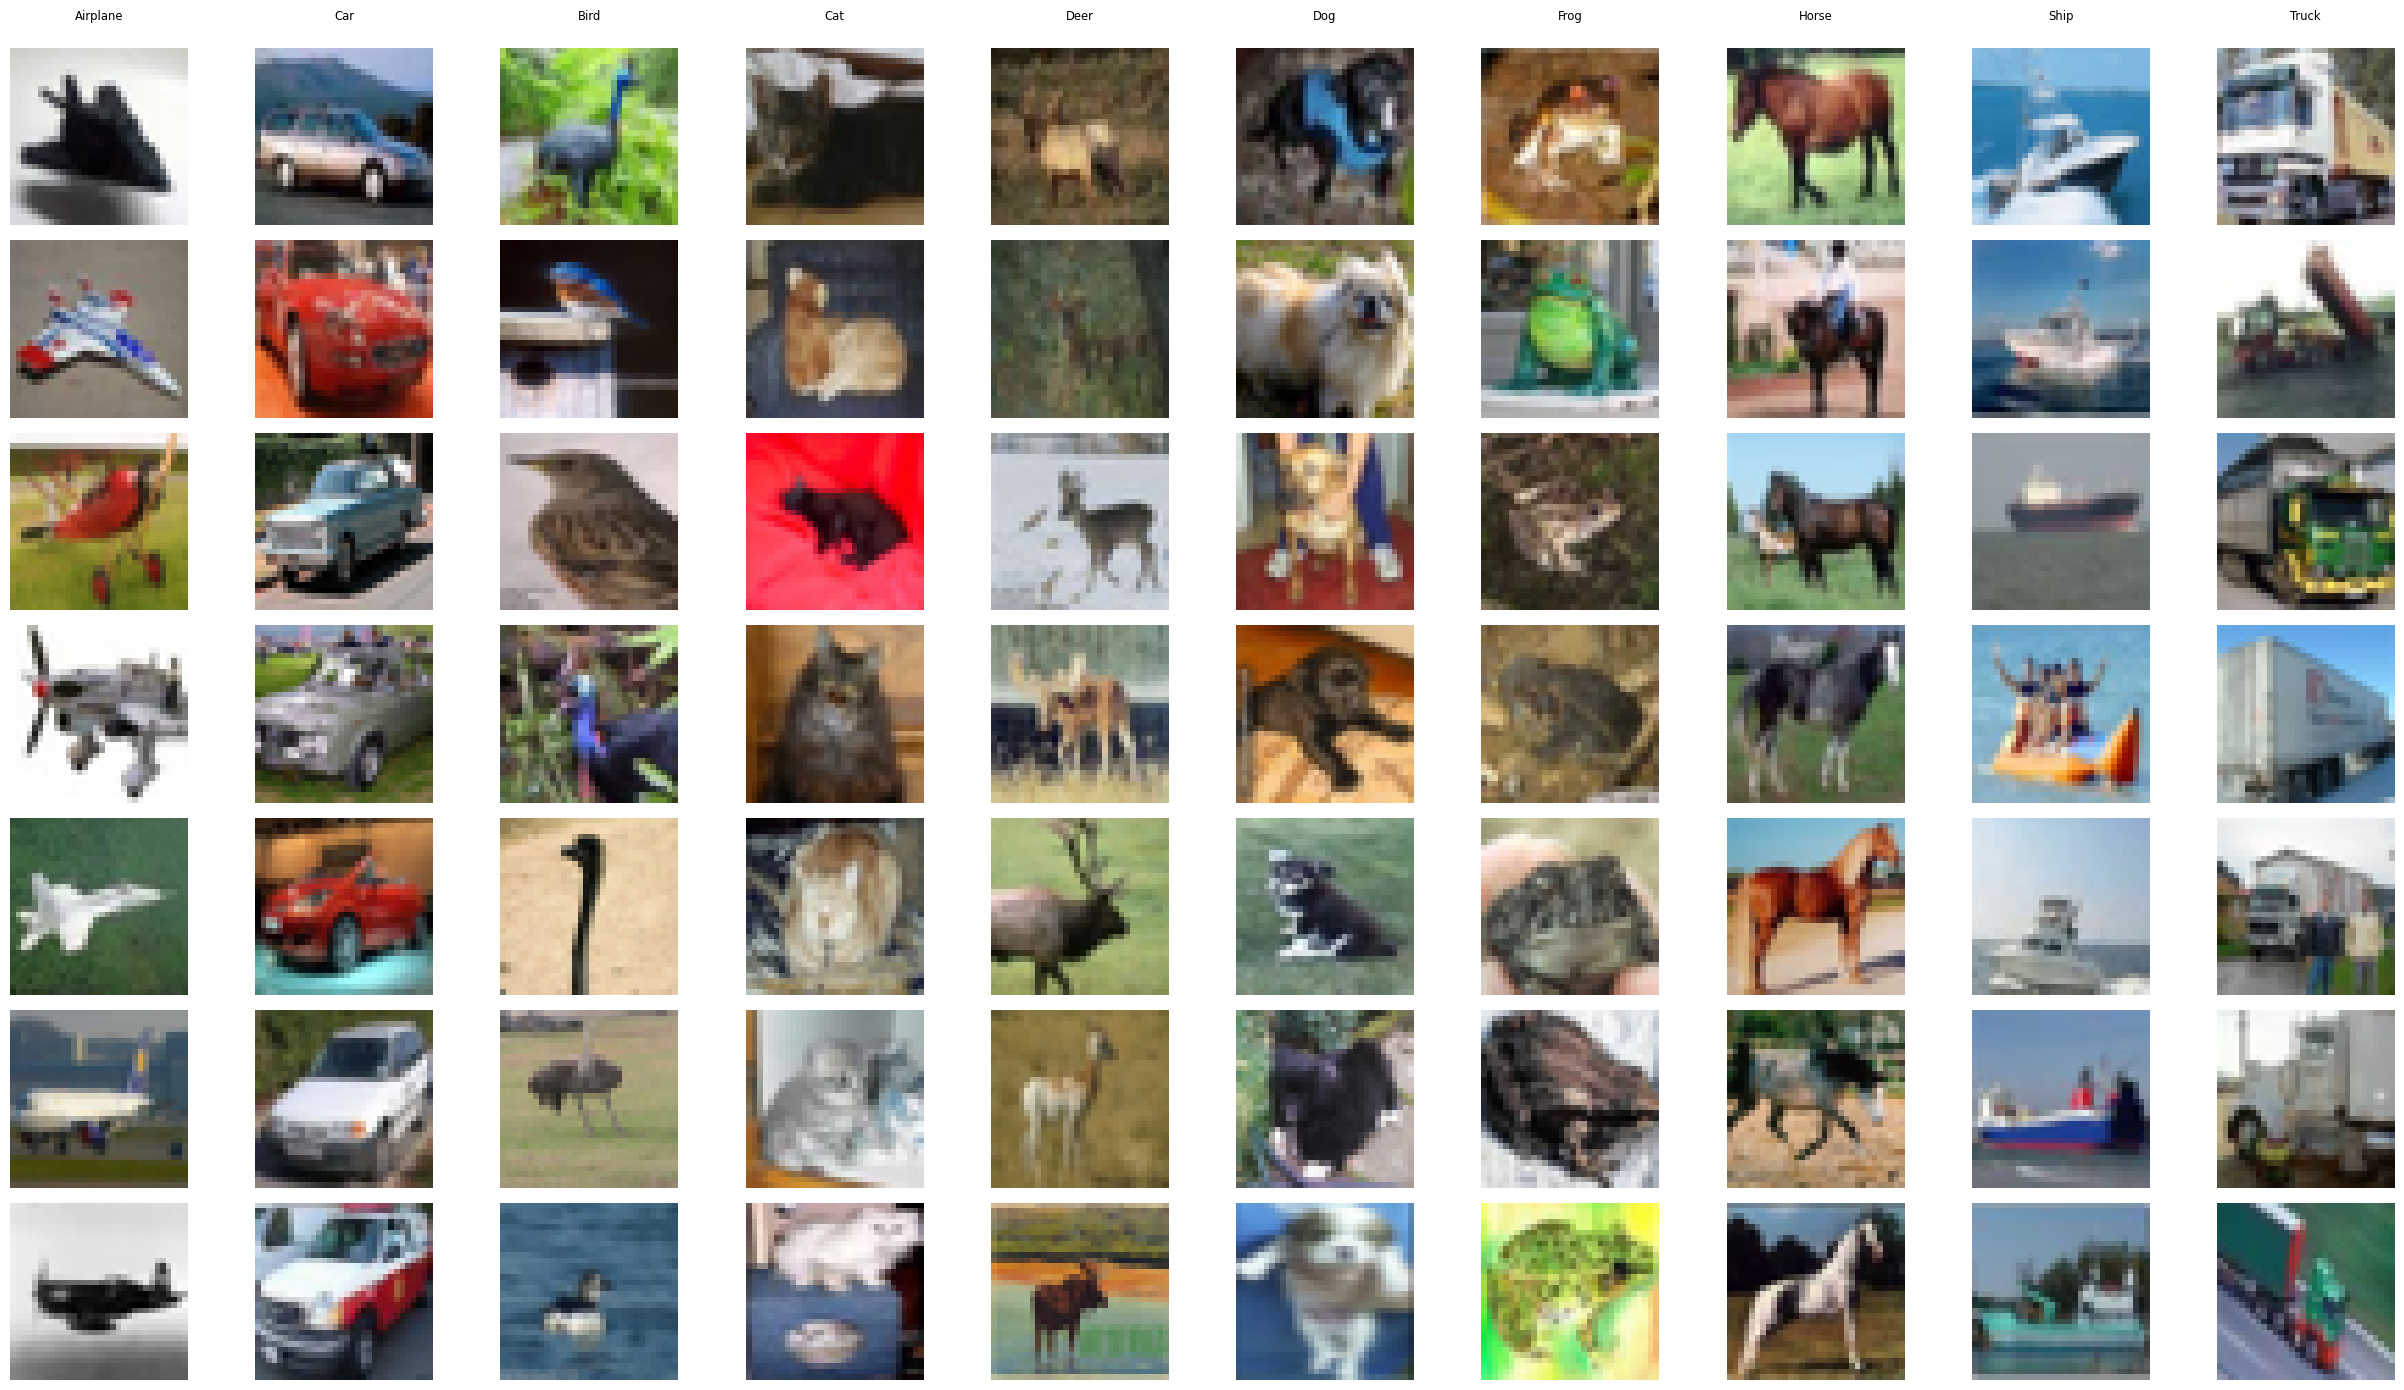

In [4]:
def display_first_images_per_class_vertical(X, y, num_classes=10, images_per_class=7):
     # Создаем фигуру с несколькими подграфами, один для каждого изображения
    fig, axs = plt.subplots(images_per_class, num_classes, figsize=(num_classes * 2.5, images_per_class * 2))
    # Метки классов
    class_labels = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
 # Для каждого класса
    for class_num in range(num_classes):
        class_indices = np.where(y == class_num)[0] # Находим индексы изображений, принадлежащих этому классу
        selected_indices = class_indices[:images_per_class] # Выбираем первые несколько индексов изображений для отображения
        for i, index in enumerate(selected_indices):
            axs[i, class_num].imshow(X[index]) # Отображаем изображение в соответствующем подграфе
            axs[i, class_num].axis('off')
        axs[0, class_num].set_title(class_labels[class_num], size='small', pad=20)   # Устанавливаем заголовок

    plt.tight_layout()
    plt.show()
# Вывод первых изображений для каждого класса
display_first_images_per_class_vertical(X_train, y_train)


1.3 Разделите данные на обучающую и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [5]:
#ограничим выборку в целях экономии времени и преобразуем ее
X_train, y_train = X_train[:5000], y_train[:5000]
X_test, y_test = X_test[:500], y_test[:500]
#Преобразуем
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
#Вывод
print(X_test.shape)
print(X_train.shape)

(500, 3072)
(5000, 3072)


### 1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [6]:
from scripts.k_nearest_neighbor import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [7]:
#расчитаем dists
dists_2 = classifier.compute_distances_two_loops(X_test)
print(dists_2.shape)
dists_1 = classifier.compute_distances_one_loop(X_test)
print(dists_1.shape)
dists_zero = classifier.compute_distances_no_loops(X_test)
print(dists_zero.shape)
#классифицируем (при k=1)
y_pred2 = classifier.predict_labels(dists_2, k=1) #two loops
y_pred1 = classifier.predict_labels(dists_1, k=1) #one loop
y_pred0 = classifier.predict_labels(dists_zero, k=1) #no loops

(500, 5000)
(500, 5000)
(500, 5000)


1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


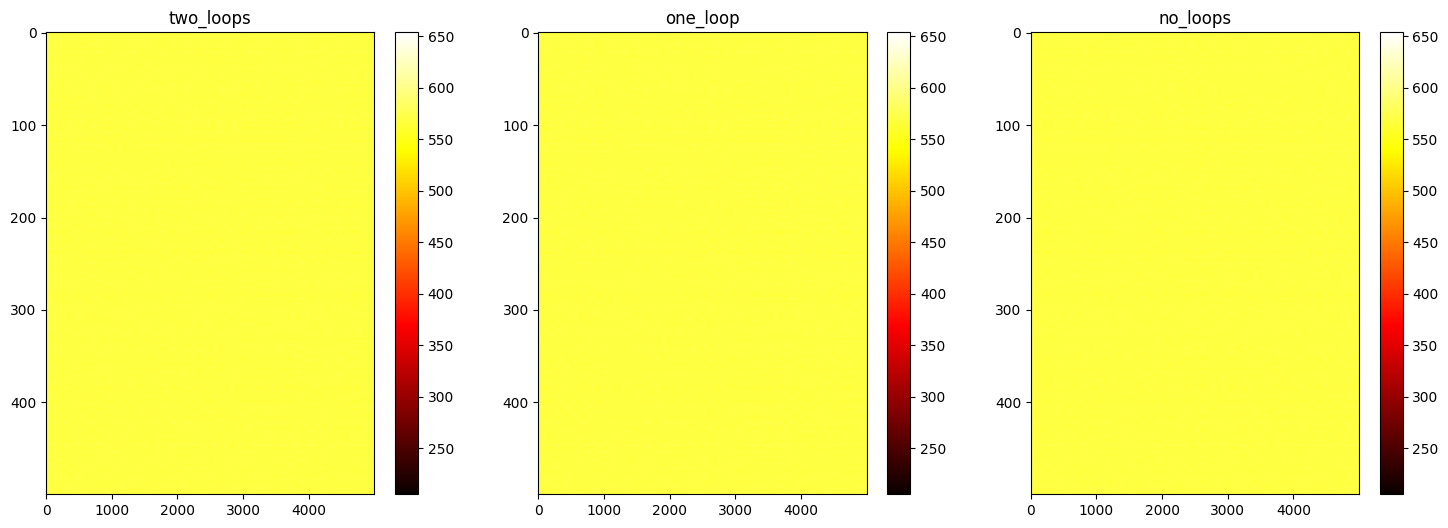

In [8]:
plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
plt.imshow(dists_2, aspect='auto', cmap='hot')
plt.colorbar()
plt.title('two_loops')
plt.grid(False)

plt.subplot(1, 3, 2)
plt.imshow(dists_1, aspect='auto', cmap='hot')
plt.colorbar()
plt.title('one_loop')
plt.grid(False)

plt.subplot(1, 3, 3)
plt.imshow(dists_zero, aspect='auto', cmap='hot')
plt.colorbar()
plt.title('no_loops')
plt.grid(False)

plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [9]:
from sklearn.metrics import accuracy_score
res1 = accuracy_score(y_pred2, y_test)
res2 = accuracy_score(y_pred1, y_test)
res3 = accuracy_score(y_pred0, y_test)

print(res1, res2, res3) #для two loops, one loop, no loops соответственно

0.176 0.176 0.176


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [10]:
#возьмем k от 1 до 25. Классфицируем и расчитаем accuracy.
predictions=[]
accuracies=[]
k_values=[]

for i in range(1, 26):
    pred = classifier.predict_labels(dists_2, k=i) #two loops
    accuracy = accuracy_score(pred, y_test)
    print(f"k={i}, accuracy= {accuracy}")
    predictions.append(pred)
    accuracies.append(accuracy)
    k_values.append(i)

k=1, accuracy= 0.176
k=2, accuracy= 0.176
k=3, accuracy= 0.196
k=4, accuracy= 0.214
k=5, accuracy= 0.208
k=6, accuracy= 0.224
k=7, accuracy= 0.23
k=8, accuracy= 0.24
k=9, accuracy= 0.24
k=10, accuracy= 0.224
k=11, accuracy= 0.22
k=12, accuracy= 0.222
k=13, accuracy= 0.228
k=14, accuracy= 0.22
k=15, accuracy= 0.226
k=16, accuracy= 0.232
k=17, accuracy= 0.238
k=18, accuracy= 0.242
k=19, accuracy= 0.238
k=20, accuracy= 0.242
k=21, accuracy= 0.228
k=22, accuracy= 0.23
k=23, accuracy= 0.224
k=24, accuracy= 0.232
k=25, accuracy= 0.234


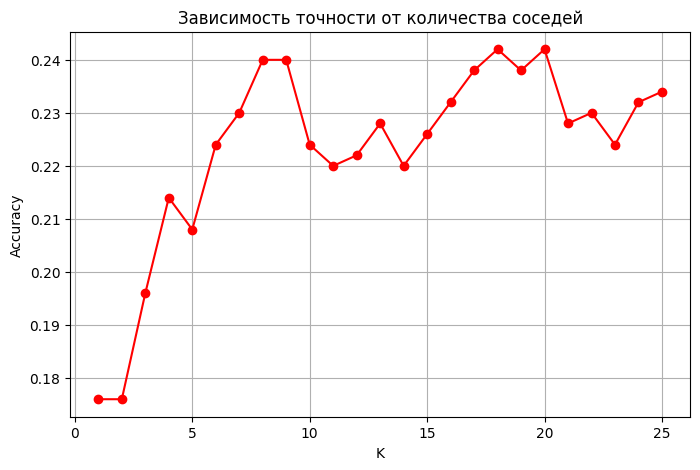

In [11]:
#Построим график
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', color='r')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Зависимость точности от количества соседей')
plt.grid(True)
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [12]:
num_folds = 5 #разделяем выборку на 5 частей


X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

k_to_accuracies = {k: [] for k in k_values}

for i in range(num_folds):
    # Создание тренировочных и валидационных наборов
    X_train_cv = np.concatenate([fold for j, fold in enumerate(X_train_folds) if j != i])
    y_train_cv = np.concatenate([fold for j, fold in enumerate(y_train_folds) if j != i])
    X_val_cv = X_train_folds[i]
    y_val_cv = y_train_folds[i]
    
    # Инициализация и обучение классификатора
    classifier = KNearestNeighbor()
    classifier.train(X_train_cv, y_train_cv)
    
    # Оценка точности для каждого k
    for k in k_values:
        y_pred_cv = classifier.predict(X_val_cv, k=k)
        accuracy = np.mean(y_pred_cv == y_val_cv)
        k_to_accuracies[k].append(accuracy)

best_k = None
best_accuracy = 0
#Будем определять лучший вариант сравнением средней точности 
for k, accuracies in k_to_accuracies.items():
    avg_accuracy = np.mean(accuracies)
    print(f'k = {k}, average accuracy = {avg_accuracy:.6f}')
    if avg_accuracy > best_accuracy:
        best_k = k
        best_accuracy = avg_accuracy

print(f'Best k = {best_k} with average accuracy = {best_accuracy:.6f}')

k = 1, average accuracy = 0.210600
k = 2, average accuracy = 0.210600
k = 3, average accuracy = 0.214000
k = 4, average accuracy = 0.214800
k = 5, average accuracy = 0.216200
k = 6, average accuracy = 0.213000
k = 7, average accuracy = 0.216800
k = 8, average accuracy = 0.213400
k = 9, average accuracy = 0.213400
k = 10, average accuracy = 0.214200
k = 11, average accuracy = 0.220000
k = 12, average accuracy = 0.220400
k = 13, average accuracy = 0.220200
k = 14, average accuracy = 0.220600
k = 15, average accuracy = 0.222600
k = 16, average accuracy = 0.222800
k = 17, average accuracy = 0.224000
k = 18, average accuracy = 0.221400
k = 19, average accuracy = 0.221200
k = 20, average accuracy = 0.220400
k = 21, average accuracy = 0.218200
k = 22, average accuracy = 0.219000
k = 23, average accuracy = 0.222800
k = 24, average accuracy = 0.221600
k = 25, average accuracy = 0.222600
Best k = 17 with average accuracy = 0.224000



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [13]:
classifier.train(X_train, y_train)
y_pred = classifier.predict_labels(dists_2, k=best_k)
res = accuracy_score(y_pred, y_test)
print(res)

0.238


1.11 Сделайте выводы по результатам 1 части задания.

In [14]:
# C увеличением значения k (при k<18) повышается точность классификации
# При увеличении выборки и увеличении значения k растет время работы программы

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [15]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Разбиение выборки
for_training = 49000
for_validation = 1000
for_test = 1000
for_dev = 500


X_val = X_train[-for_validation:]
y_val = y_train[-for_validation:]

X_train = X_train[:for_training]
y_train = y_train[:for_training]

dev_indices = np.random.choice(for_training, for_dev, replace=False)
X_dev = X_train[dev_indices]
y_dev = y_train[dev_indices]


X_test = X_test[:for_test]
y_test = y_test[:for_test]

#Преобразуем
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


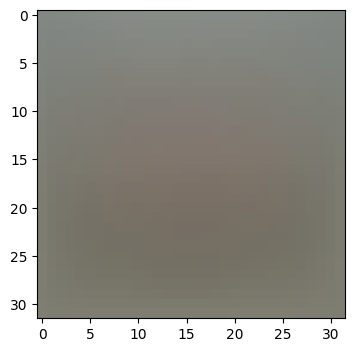

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [16]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.grid(False)
plt.show()

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_dev = X_dev.astype('float32')

X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

#добавляем дополнительную размерность и заполняем единицей
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [17]:
from scripts.linear_svm import svm_loss_naive
import time


W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 9.004060


C:\Users\finnp\AppData\Local\Temp\ipykernel_19200\1416695880.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('loss: %f' % (loss, ))



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [19]:

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 15.829522 analytic: 0.000000, relative error: 1.000000e+00
numerical: -14.132712 analytic: 0.000000, relative error: 1.000000e+00
numerical: 18.485313 analytic: 0.000000, relative error: 1.000000e+00
numerical: -17.223599 analytic: 0.000000, relative error: 1.000000e+00
numerical: -34.961045 analytic: 0.000000, relative error: 1.000000e+00
numerical: 12.596928 analytic: 0.000000, relative error: 1.000000e+00
numerical: 14.490690 analytic: 0.000000, relative error: 1.000000e+00
numerical: -34.500169 analytic: 0.000000, relative error: 1.000000e+00
numerical: -4.777998 analytic: 0.000000, relative error: 1.000000e+00
numerical: -4.106419 analytic: 0.000000, relative error: 1.000000e+00
numerical: -3.760946 analytic: 0.002984, relative error: 1.000000e+00
numerical: -10.552067 analytic: 0.002436, relative error: 1.000000e+00
numerical: 6.154226 analytic: -0.001990, relative error: 1.000000e+00
numerical: 1.702754 analytic: -0.005497, relative error: 1.000000e+00
numerical: -16.

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [20]:
from scripts.linear_svm import svm_loss_vectorized
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.055850s
Vectorized loss and gradient: computed in 0.024134s
difference: 4202.599839


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [24]:
from scripts.linear_classifier import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 402.912295
iteration 100 / 1500: loss 533.110022
iteration 200 / 1500: loss 2462.514297
iteration 300 / 1500: loss 4469.604917
iteration 400 / 1500: loss 5913.769257
iteration 500 / 1500: loss 3152.926093
iteration 600 / 1500: loss 4749.616540
iteration 700 / 1500: loss 4208.549318
iteration 800 / 1500: loss 12023.511433
iteration 900 / 1500: loss 7917.910288
iteration 1000 / 1500: loss 5437.665476
iteration 1100 / 1500: loss 5370.902337
iteration 1200 / 1500: loss 5439.359760
iteration 1300 / 1500: loss 8247.266143
iteration 1400 / 1500: loss 6215.346554
That took 3.625720s


In [25]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.099958
validation accuracy: 0.101035


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [26]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

In [28]:
# Настройка параметров обучения
rates_learning = [1e-7, 5e-5]
strengths_regularization = [1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4, 1e5]
# Инициализация хранилища результатов и наилучших значений
outcome = {}
top_validation_accuracy = -1
top_model = None

# Перебор комбинаций параметров
for strength in strengths_regularization:
    for rate in rates_learning:
        model_svm = LinearSVM()
        history_loss = model_svm.train(X_train, y_train, rate, strength, num_iters=3000)
        predictions_train = model_svm.predict(X_train)
        accuracy_train = np.mean(y_train == predictions_train)
        predictions_val = model_svm.predict(X_val)
        accuracy_val = np.mean(y_val == predictions_val)
        if accuracy_val > top_validation_accuracy:
            top_validation_accuracy = accuracy_val
            top_model = model_svm           
        outcome[(rate,strength)] = accuracy_train, accuracy_val

# Вывод результатов
for (rate_learning, strength_regularization) in sorted(outcome):
    accuracy_training, accuracy_validation = outcome[(rate_learning, strength_regularization)]
    print(f'Learning rate: {rate_learning:e} Regularization strength: {strength_regularization:e} - Training accuracy: {accuracy_training:.3f}, Validation accuracy: {accuracy_validation:.3f}')

print(f'Best validation accuracy during cross-validation: {top_validation_accuracy:.3f}')

Learning rate: 1.000000e-07 Regularization strength: 1.000000e+04 - Training accuracy: 0.100, Validation accuracy: 0.099
Learning rate: 1.000000e-07 Regularization strength: 2.000000e+04 - Training accuracy: 0.100, Validation accuracy: 0.104
Learning rate: 1.000000e-07 Regularization strength: 3.000000e+04 - Training accuracy: 0.100, Validation accuracy: 0.100
Learning rate: 1.000000e-07 Regularization strength: 4.000000e+04 - Training accuracy: 0.100, Validation accuracy: 0.098
Learning rate: 1.000000e-07 Regularization strength: 5.000000e+04 - Training accuracy: 0.100, Validation accuracy: 0.099
Learning rate: 1.000000e-07 Regularization strength: 6.000000e+04 - Training accuracy: 0.100, Validation accuracy: 0.103
Learning rate: 1.000000e-07 Regularization strength: 7.000000e+04 - Training accuracy: 0.100, Validation accuracy: 0.104
Learning rate: 1.000000e-07 Regularization strength: 8.000000e+04 - Training accuracy: 0.100, Validation accuracy: 0.097
Learning rate: 1.000000e-07 Regu

2.9 Сделайте выводы по второй части задания

In [27]:
#Регуляризация влияет на точность и время работы алгоритма. Векторная реализация работает намного быстрее наивной.